<a href="https://colab.research.google.com/github/wallik2/University-stuff/blob/main/Intro_Data_Sci/Homework/HW7_Raw_Iris_Data_%26_Trip_advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Raw Iris Data



---



### 1) Data Exploration

In [ ]:
import pandas as pd

In [ ]:
Raw_Iris_data = pd.read_csv('/content/drive/MyDrive/Data /raw_iris.csv')

Raw_Iris_data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Raw_Iris_data.describe()

,0,1,2,3
count,150.000000,145.000000,150.000000,149.000000
mean,6.519267,3.046207,3.758667,1.205369
std,6.402823,0.436212,1.764420,0.761292
min,-4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,60.990000,4.400000,6.900000,2.500000


In [ ]:
len(Raw_Iris_data.index)

150

In [ ]:
for i in range(len(Raw_Iris_data.columns)) :
    print("Nan in Column ", i , " : " ,  Raw_Iris_data.iloc[:,i].isnull().sum())

Nan in Column  0  :  0
Nan in Column  1  :  5
Nan in Column  2  :  0
Nan in Column  3  :  1
Nan in Column  4  :  2


In [ ]:
for i in range(len(Raw_Iris_data.columns)-1) :
    print("Mean of Column ", i , " : " ,  Raw_Iris_data.iloc[:,i].mean())

Mean of Column  0  :  6.519266666666668
Mean of Column  1  :  3.046206896551725
Mean of Column  2  :  3.7586666666666693
Mean of Column  3  :  1.2053691275167793


In [ ]:
for i in range(len(Raw_Iris_data.columns)-1) :
    print("Max of Column ", i , " : " ,  Raw_Iris_data.iloc[:,i].max())

Max of Column  0  :  60.99
Max of Column  1  :  4.4
Max of Column  2  :  6.9
Max of Column  3  :  2.5


In [ ]:
for i in range(len(Raw_Iris_data.columns)-1) :
    print("Min of Column ", i , " : " ,  Raw_Iris_data.iloc[:,i].min())

Min of Column  0  :  -4.3
Min of Column  1  :  2.0
Min of Column  2  :  1.0
Min of Column  3  :  0.1




---


### 2) Data Cleaning

#### I. Deal with Missing value

In [ ]:
Deleted_Na_data = Raw_Iris_data.dropna()       # drop NA

Deleted_Na_data = Deleted_Na_data.reset_index() #reset Index

Deleted_Na_data

,index,0,1,2,3,4
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
138,145,6.7,3.0,5.2,2.3,Iris-virginica
139,146,6.3,2.5,5.0,1.9,Iris-virginica
140,147,6.5,3.0,5.2,2.0,Iris-virginica
141,148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Deleted_Na_data.count()

index    143
0        143
1        143
2        143
3        143
4        143
dtype: int64

In [ ]:
Deleted_Na_data.describe()

,index,0,1,2,3
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,75.734266,6.565664,3.039860,3.797203,1.211189
std,42.915894,6.552783,0.435751,1.750812,0.754900
min,0.000000,-4.300000,2.000000,1.100000,0.100000
25%,39.500000,5.100000,2.800000,1.600000,0.300000
50%,76.000000,5.800000,3.000000,4.400000,1.300000
75%,112.500000,6.400000,3.300000,5.100000,1.800000
max,149.000000,60.990000,4.400000,6.900000,2.500000


### II. Deal with the outliers

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats

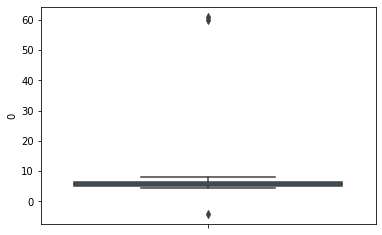

In [ ]:
sns.boxplot(y=Deleted_Na_data['0'])

Outlier Detection

In [ ]:
z_0 = np.abs(stats.zscore(Deleted_Na_data['0']))

Deleted_Na_data['0'][z_0 >= 2] 

9     60.99
10    60.00
Name: 0, dtype: float64

In [ ]:
z_3 = np.abs(stats.zscore(Deleted_Na_data['3']))

Deleted_Na_data['3'][z_3 >= 2] 

Series([], Name: 3, dtype: float64)



---



Outlier & MIssing value Removed Data

In [ ]:
#remove outlier values in column 0 from the dataset

No_outlier_missingval_data = Deleted_Na_data[z_0 < 2] 

No_outlier_missingval_data

,index,0,1,2,3,4
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
138,145,6.7,3.0,5.2,2.3,Iris-virginica
139,146,6.3,2.5,5.0,1.9,Iris-virginica
140,147,6.5,3.0,5.2,2.0,Iris-virginica
141,148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
No_outlier_missingval_data = No_outlier_missingval_data.reset_index() #reset Index


In [ ]:
No_outlier_missingval_data


,level_0,index,0,1,2,3,4
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...,...
136,138,145,6.7,3.0,5.2,2.3,Iris-virginica
137,139,146,6.3,2.5,5.0,1.9,Iris-virginica
138,140,147,6.5,3.0,5.2,2.0,Iris-virginica
139,141,148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Removing the old index columns
del No_outlier_missingval_data['index']
del No_outlier_missingval_data['level_0']

In [ ]:
No_outlier_missingval_data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
136,6.7,3.0,5.2,2.3,Iris-virginica
137,6.3,2.5,5.0,1.9,Iris-virginica
138,6.5,3.0,5.2,2.0,Iris-virginica
139,6.2,3.4,5.4,2.3,Iris-virginica




---


### III. Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
Normalized_data = min_max_scaler.fit_transform(No_outlier_missingval_data.loc[:,['0','1','2','3']])
Normalized_data = pd.DataFrame(Normalized_data,columns=['0','1','2','3'])

In [ ]:
Normalized_data

,0,1,2,3
0,0.770492,0.625000,0.051724,0.041667
1,0.754098,0.416667,0.051724,0.041667
2,0.737705,0.500000,0.034483,0.041667
3,0.729508,0.458333,0.068966,0.041667
4,0.762295,0.666667,0.051724,0.041667
...,...,...,...,...
136,0.901639,0.416667,0.706897,0.916667
137,0.868852,0.208333,0.672414,0.750000
138,0.885246,0.416667,0.706897,0.791667
139,0.860656,0.583333,0.741379,0.916667


In [ ]:
Normalized_data = Normalized_data.join(No_outlier_missingval_data['4'])

In [ ]:
Normalized_data

,0,1,2,3,4
0,0.770492,0.625000,0.051724,0.041667,Iris-setosa
1,0.754098,0.416667,0.051724,0.041667,Iris-setosa
2,0.737705,0.500000,0.034483,0.041667,Iris-setosa
3,0.729508,0.458333,0.068966,0.041667,Iris-setosa
4,0.762295,0.666667,0.051724,0.041667,Iris-setosa
...,...,...,...,...,...
136,0.901639,0.416667,0.706897,0.916667,Iris-virginica
137,0.868852,0.208333,0.672414,0.750000,Iris-virginica
138,0.885246,0.416667,0.706897,0.791667,Iris-virginica
139,0.860656,0.583333,0.741379,0.916667,Iris-virginica


In [ ]:
# the data values of all attribute in row 0

Normalized_data.iloc[0,:]

0       0.770492
1          0.625
2      0.0517241
3      0.0416667
4    Iris-setosa
Name: 0, dtype: object

---


###IV. Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
label_data = label_encoder.fit_transform(Normalized_data['4'])

Normalized_data['label_country'] = label_data

display(Normalized_data)


,0,1,2,3,4,label_country
0,0.770492,0.625000,0.051724,0.041667,Iris-setosa,0
1,0.754098,0.416667,0.051724,0.041667,Iris-setosa,0
2,0.737705,0.500000,0.034483,0.041667,Iris-setosa,0
3,0.729508,0.458333,0.068966,0.041667,Iris-setosa,0
4,0.762295,0.666667,0.051724,0.041667,Iris-setosa,0
...,...,...,...,...,...,...
136,0.901639,0.416667,0.706897,0.916667,Iris-virginica,2
137,0.868852,0.208333,0.672414,0.750000,Iris-virginica,2
138,0.885246,0.416667,0.706897,0.791667,Iris-virginica,2
139,0.860656,0.583333,0.741379,0.916667,Iris-virginica,2


In [ ]:
print(label_encoder.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']




---



# II. Tripadvisor_hotel_reviews

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

### 1) Prepare the data

In [ ]:
Tripadvisor_hotel_data = pd.read_csv('/content/drive/MyDrive/Data /tripadvisor_hotel_reviews.csv')

In [ ]:
Tripadvisor_hotel_data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1




---

### 2) Split text in attribute "Review"




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
textdata = Tripadvisor_hotel_data['Review']    

In [ ]:
X = cv.fit_transform(textdata)

print(cv.get_feature_names()) #splitting words

['00', '000', '0001', '000__çî_', '000hope', '000rp', '000rupiah', '000sf', '000us', '000year', '0030', '00a', '00am', '00beach', '00dls', '00dollars', '00eur', '00for', '00gbp', '00hrs', '00ish', '00md', '00p', '00pm', '00pp', '00stop', '00the', '00us', '00usd', '01', '0114', '0123', '0126', '01st', '02', '0200', '025', '02where', '03', '0300', '0361', '04', '04hotel', '04i', '05', '050', '0500', '050700', '0530', '0540', '055', '05i', '05pm', '06', '0600', '0645', '06recently', '06there', '06we', '07', '0700', '0705', '0730', '0764112570', '07hola', '07reviewer', '08', '0800', '081', '0810', '0820', '0830', '0830am', '0840', '0845', '085', '0850', '08did', '08if', '09', '0900', '0900hrs', '0915', '0920', '0930', '095', '0__ç_é_', '0h0', '0kay', '0r', '10', '100', '1000', '10000', '100000000000000000000000000000000000', '1000___', '1000am', '1000ft', '1000hkd', '1000pp', '1001', '10060', '1008', '1009', '100__ç_é_', '100am', '100degrees', '100euro', '100euros', '100hk', '100m', '100m2

Encoding 

In [ ]:
Encoded = pd.DataFrame(X.toarray() ,columns = cv.get_feature_names())       #This line takes long time since we convert from sparse Matrix to dense matrix (array)
#Tripadvisor_hotel_data_encoded = Tripadvisor_hotel_data.join(Encoded)



---



In [ ]:
Encoded

In [ ]:
Total = np.array([])

for i in range(len(Encoded)):
  k = Encoded.iloc[:,i].sum()
  Total = np.append(Total,k)


In [ ]:
Sorted_Total = Total.copy()

In [ ]:
Sorted_Total.sort()

Sorted_Total

In [ ]:
Total

In [ ]:
min_1, min_2, min_3 = Sorted_Total[1], Sorted_Total[2],Sorted_Total[3]
max_1, max_2, max_3 = Sorted_Total[-1], Sorted_Total[-2], Sorted_Total[-3]

In [ ]:
Sorted_Total[2]

In [ ]:
Most_Least = (min_1, min_2, min_3, max_3, max_2, max_1) 

In [ ]:
Most_Least

In [ ]:
for i in Most_Least:
  result = np.where(Total == i)
  print(result)


# The column index of Least frequently occurring words are 2 , 4, 6 ,.....,20484, 20486, 20489 (but we pick just 2,4,6)
# The column index of Most frequently occurring words are 14912, 6490, 13906 respectively

In [ ]:
print(Encoded.iloc[:,14912].sum())
print(Encoded.iloc[:,6490].sum())
print(Encoded.iloc[:,13906].sum())
print(Encoded.iloc[:,2].sum())
print(Encoded.iloc[:,4].sum())
print(Encoded.iloc[:,6].sum())

# check to make sure!

In [ ]:
Encoded.iloc[:,[14912,6490,13906,2,4,6]]

#the column from the most to the least word

# Three Most
#did : 14006 words
#beach : 10061 words
#day : 9967 words


# Three Least
#0001,000hope,000rupiah : 1 word



---


---

---

---

---

---

---

---

---

















---




In [ ]:
Tripadvisor_Encoded = pd.DataFrame(columns= list(Tripadvisor_hotel_data.columns) + cv.get_feature_names())

Tripadvisor_Encoded

In [ ]:
"""
Tripadvisor_Encoded = pd.DataFrame(columns= list(Tripadvisor_hotel_data.columns) + cv.get_feature_names())

L = len(Tripadvisor_hotel_data)-1

for i in range(0,L,10):
  j = i+10

  piece_Excoded = pd.concat([Tripadvisor_hotel_data[i:j], Encoded[i:j]], axis=1, join="inner")

  Tripadvisor_Encoded = Tripadvisor_Encoded.append(piece_Excoded)
"""

#Trial 1 : Failed
